### Multi-layer solutions of examples in 'Multilayer Analytic Element Modeling of Radial Collector Wells'

[Bakker, M., Kelson, V.A. and Luther, K.H., 2005. Multilayer analytic element modeling of radial collector wells. Groundwater, 43(6), pp.926-934.](https://doi.org/10.1111/j.1745-6584.2005.00116.x)

In [1]:
import numpy as np

import timml

#### Example 1

In [2]:
k = 150  # hydraulic conductivity, m/d
z = [24, 16, 11, 7, 5, 4.05, 3.45, 3.15, 2.85, 2.55, 1.95, 1, 0]
kzoverkh = 1
layerw = 7
Qw = 12_000  # discharge of well, m^3/d
L = 60  # length of well, m
rw = 0.15  # radius of well, m
nls = 10  # number of (equally sized) line-sinks
xr, yr, hr = 60, 0, 24  # coordinates and head at reference point
#
xy = np.array(
    list(zip(np.linspace(-L / 2, L / 2, nls + 1), np.zeros(nls + 1), strict=False))
)
xyalt = np.zeros((nls, 4))  # specify begin and end of each line-sink
xyalt[:, 0] = xy[:-1, 0]
xyalt[:, 1] = xy[:-1, 1]
xyalt[:, 2] = xy[1:, 0]
xyalt[:, 3] = xy[1:, 1]

In [3]:
ml = timml.Model3D(kaq=k, z=z, kzoverkh=kzoverkh)
w = timml.CollectorWell(model=ml, xy=xy, Qw=Qw, layers=layerw, rw=rw)
rf = timml.Constant(model=ml, xr=xr, yr=yr, hr=hr, layer=0)
ml.solve()

Number of elements, Number of equations: 2 , 11
.
solution complete


In [4]:
print("xcp, ycp, head in control points")
for i in range(nls):
    ls = w.lslist[i]
    print(ls.xc[0], ls.yc[0], ml.head(ls.xc[0], ls.yc[0], layers=layerw))

xcp, ycp, head in control points
-27.0 0.15 22.345493968495067
-21.0 0.15 22.34549396849537
-15.0 0.15 22.345493968494612
-9.0 0.15 22.345493968495028
-3.0 0.15 22.345493968494978
3.0 0.15 22.345493968495013
9.0 0.15 22.34549396849455
15.0 0.15 22.3454939684953
21.0 0.15 22.34549396849459
27.0 0.15 22.345493968495326


In [5]:
print(f"head in top layer at center of well {ml.head(0, 0, layers=0):.2f} m")

head in top layer at center of well 23.42 m


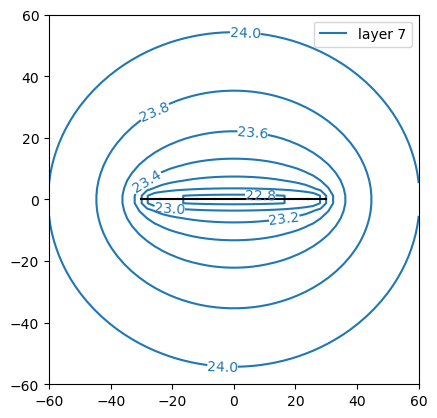

In [6]:
ml.plots.contour(
    win=[-60, 60, -60, 60],
    ngr=50,
    layers=7,
    levels=np.arange(20, 24.1, 0.2),
    decimals=1,
)

In [7]:
ml = timml.Model3D(kaq=k, z=z, kzoverkh=kzoverkh)
w = timml.CollectorWell(model=ml, xy=xyalt, Qw=Qw, layers=layerw, rw=rw)
rf = timml.Constant(model=ml, xr=xr, yr=yr, hr=hr, layer=0)
ml.solve()

Number of elements, Number of equations: 2 , 11
.
solution complete


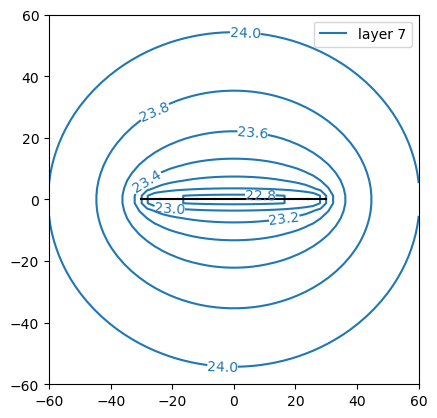

In [8]:
ml.plots.contour(
    win=[-60, 60, -60, 60],
    ngr=50,
    layers=7,
    levels=np.arange(20, 24.1, 0.2),
    decimals=1,
);

In [9]:
print("xcp, ycp, head in control points")
for i in range(nls):
    ls = w.lslist[i]
    print(ls.xc[0], ls.yc[0], ml.head(ls.xc[0], ls.yc[0], layers=layerw))

xcp, ycp, head in control points
-27.0 0.15 22.345493968495067
-21.0 0.15 22.34549396849537
-15.0 0.15 22.345493968494612
-9.0 0.15 22.345493968495028
-3.0 0.15 22.345493968494978
3.0 0.15 22.345493968495013
9.0 0.15 22.34549396849455
15.0 0.15 22.3454939684953
21.0 0.15 22.34549396849459
27.0 0.15 22.345493968495326


In [10]:
print(f"head in top layer at center of well {ml.head(0, 0, layers=0):.2f} m")

head in top layer at center of well 23.42 m


#### Example 2

Number of elements, Number of equations: 2 , 51
.
solution complete


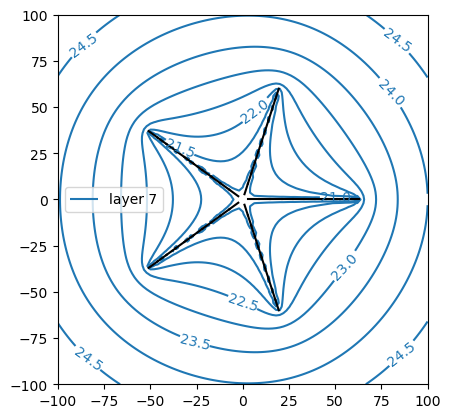

In [11]:
rcaisson = 3  # radius caisson, m
xr, yr, hr = 100, 0, 24  # coordinates and head at reference point, m
Qw = 60_000  # discharge of well, m^3/d
narms = 5

ml = timml.Model3D(kaq=k, z=z, kzoverkh=kzoverkh)
w = timml.RadialCollectorWell(
    model=ml,
    x=0,
    y=0,
    L=60,
    rcaisson=rcaisson,
    Qw=Qw,
    narms=narms,
    rw=rw,
    nls=nls,
    layers=7,
)
rf = timml.Constant(model=ml, xr=xr, yr=yr, hr=hr, layer=0)
ml.solve()
ml.plots.contour(
    win=[-100, 100, -100, 100],
    ngr=101,
    layers=7,
    levels=np.arange(21, 30, 0.5),
    decimals=1,
);

In [12]:
w.lslist[0]

HeadLineSink from (3.0, 0.0) to (9.0, 0.0)

Number of elements, Number of equations: 2 , 51
.
solution complete


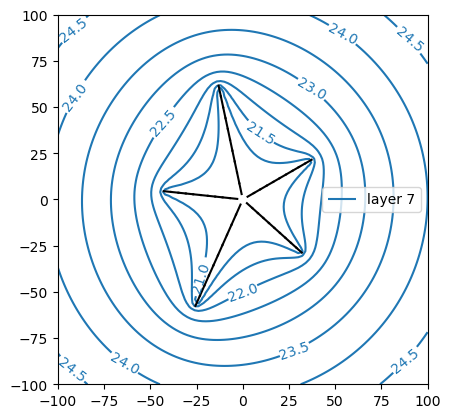

In [13]:
rcaisson = 3  # radius caisson, m
xr, yr, hr = 100, 0, 24  # coordinates and head at reference point, m
Qw = 60_000  # discharge of well, m^3/d
narms = 5

ml = timml.Model3D(kaq=k, z=z, kzoverkh=kzoverkh)
w = timml.RadialCollectorWell(
    model=ml,
    x=0,
    y=0,
    L=[40, 60, 40, 60, 40],
    angle=30,
    rcaisson=rcaisson,
    Qw=Qw,
    narms=narms,
    rw=rw,
    nls=nls,
    layers=7,
)
rf = timml.Constant(model=ml, xr=xr, yr=yr, hr=hr, layer=0)
ml.solve()
ml.plots.contour(
    win=[-100, 100, -100, 100],
    ngr=101,
    layers=7,
    levels=np.arange(21, 30, 0.5),
    decimals=1,
);

Number of elements, Number of equations: 2 , 51
.
solution complete


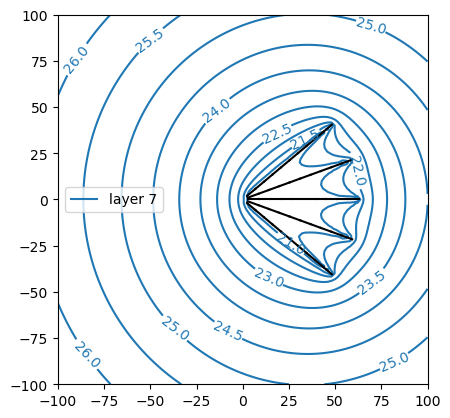

In [14]:
rcaisson = 3  # radius caisson, m
xr, yr, hr = 100, 0, 24  # coordinates and head at reference point, m
Qw = 60_000  # discharge of well, m^3/d
narms = 5

ml = timml.Model3D(kaq=k, z=z, kzoverkh=kzoverkh)
w = timml.RadialCollectorWell(
    model=ml,
    x=0,
    y=0,
    L=60,
    angle=[-40, -20, 0, 20, 40],
    rcaisson=rcaisson,
    Qw=Qw,
    narms=narms,
    rw=rw,
    nls=nls,
    layers=7,
)
rf = timml.Constant(model=ml, xr=xr, yr=yr, hr=hr, layer=0)
ml.solve()
ml.plots.contour(
    win=[-100, 100, -100, 100],
    ngr=101,
    layers=7,
    levels=np.arange(21, 30, 0.5),
    decimals=1,
);

Number of elements, Number of equations: 2 , 51
.
solution complete


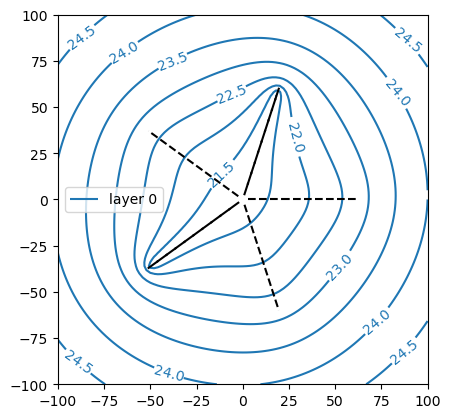

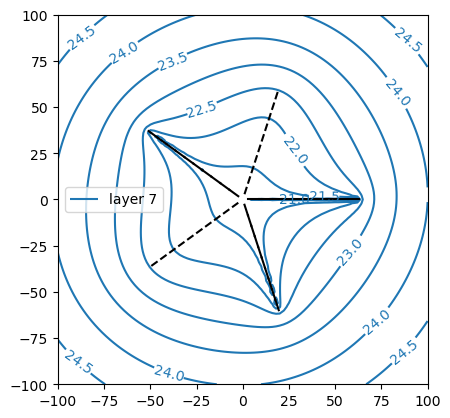

In [15]:
rcaisson = 3  # radius caisson, m
xr, yr, hr = 100, 0, 24  # coordinates and head at reference point, m
Qw = 60_000  # discharge of well, m^3/d
narms = 5

ml = timml.Model3D(kaq=k, z=z, kzoverkh=kzoverkh)
w = timml.RadialCollectorWell(
    model=ml,
    x=0,
    y=0,
    L=60,
    rcaisson=rcaisson,
    Qw=Qw,
    narms=narms,
    rw=rw,
    nls=nls,
    layers=[7, 0, 7, 0, 7],  # just for illustration purposes
)
rf = timml.Constant(model=ml, xr=xr, yr=yr, hr=hr, layer=0)
ml.solve()
ml.plots.contour(
    win=[-100, 100, -100, 100],
    ngr=101,
    layers=0,
    levels=np.arange(21, 30, 0.5),
    decimals=1,
)
# plot arms in layer 0 with dashed lines
w.plot(layer=7, ls="dashed")
ml.plots.contour(
    win=[-100, 100, -100, 100],
    ngr=101,
    layers=7,
    levels=np.arange(21, 30, 0.5),
    decimals=1,
)
# plot arms in layer 0 with dashed lines
w.plot(layer=0, ls="dashed");

In [16]:
headinside = []
print("head in collector well:", w.headinside())
for i in range(w.nls):
    ls = w.lslist[i]
    headinside.append(ml.head(ls.xc[0], ls.yc[0], layers=ls.layers[0]))
headinside = np.array(headinside)
assert np.allclose(headinside[1:], headinside[0])

head in collector well: 21.056789901778046


In [17]:
Q_arms = w.discharge_per_arm()
print("discharge of each arm: ", Q_arms)

discharge of each arm:  [ 9729.2907105  15684.14182213  9165.08778886 15690.49047933
  9730.98919918]


Note that the discharge of arms 0, 2, 4, and the discharges of arms 1, 3 are not exactly equal, even though you may expect that from symmetry. This is the case because the control points are put a horizontal distance `rw` away along each arm, always on the left side when going from the point closest to the caisson to the end point.